In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import math


In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91108,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


In [4]:
#Dropping Columns ---> ID, ZIP Code
df.drop(columns=['ID', 'ZIP Code'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 5000 non-null   int64 
 1   Experience          5000 non-null   int64 
 2   Income              5000 non-null   int64 
 3   Family              5000 non-null   int64 
 4   CCAvg               5000 non-null   object
 5   Education           5000 non-null   int64 
 6   Mortgage            5000 non-null   int64 
 7   Personal Loan       5000 non-null   int64 
 8   Securities Account  5000 non-null   int64 
 9   CD Account          5000 non-null   int64 
 10  Online              5000 non-null   int64 
 11  CreditCard          5000 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 468.9+ KB


In [6]:
df['CCAvg'] = df['CCAvg'].str.replace('/', '.')
df['CCAvg'] = df['CCAvg'].astype(float)*12

In [7]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,19.2,1,0,0,1,0,0,0
1,45,19,34,3,18.0,1,0,0,1,0,0,0
2,39,15,11,1,12.0,1,0,0,0,0,0,0
3,35,9,100,1,32.4,2,0,0,0,0,0,0
4,35,8,45,4,12.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,22.8,3,0,0,0,0,1,0
4996,30,4,15,4,4.8,1,85,0,0,0,1,0
4997,63,39,24,2,3.6,3,0,0,0,0,0,0
4998,65,40,49,3,6.0,2,0,0,0,0,1,0


In [8]:
for name in df.drop(columns=['Age', 'Experience', 'Income', 'CCAvg','Mortgage']).columns:
    unique_values = df[name].unique()
    print(f'Unique values in {name}--> {unique_values}')


Unique values in Family--> [4 3 1 2]
Unique values in Education--> [1 2 3]
Unique values in Personal Loan--> [0 1]
Unique values in Securities Account--> [1 0]
Unique values in CD Account--> [0 1]
Unique values in Online--> [0 1]
Unique values in CreditCard--> [0 1]


# Analysing each columns like their counts, distribution, what the percentage of count that each column hold 


/tmp/ipykernel_269252/1437643462.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Family', palette='coolwarm')


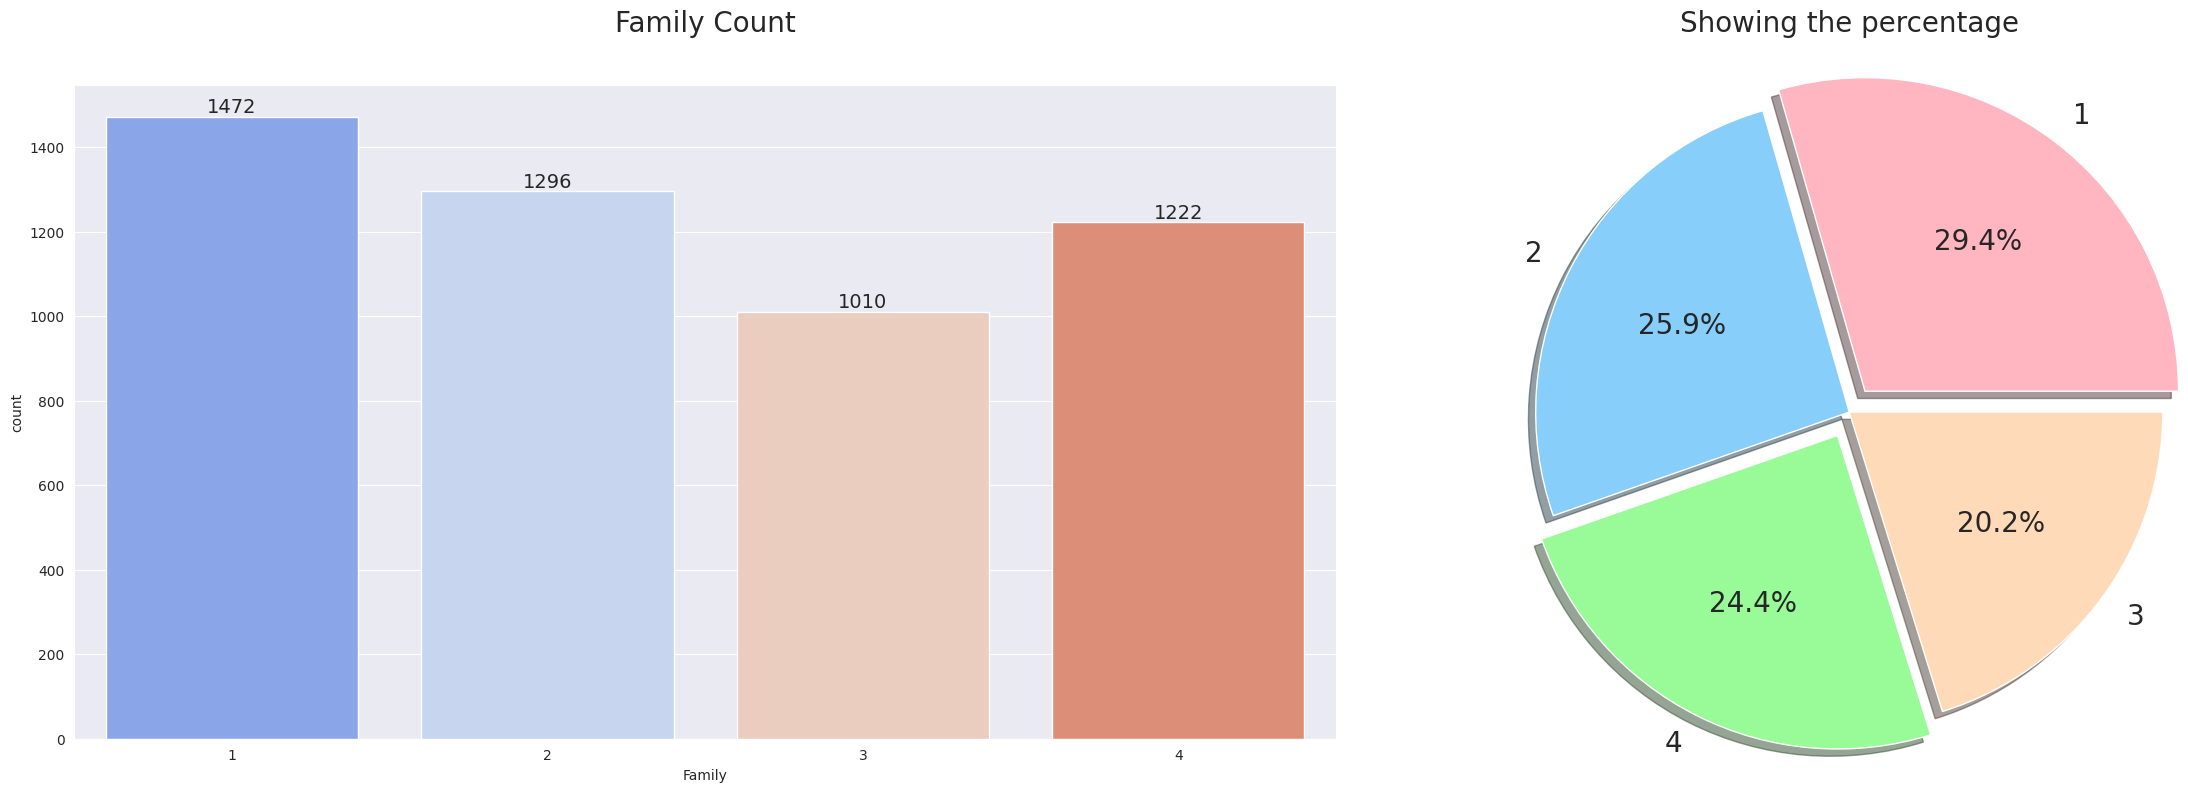

In [9]:
plt.figure(figsize=(25, 8))
sns.set_style('darkgrid')
x= df['Family'].value_counts()
clrs = ["#FFB6C1", "#87CEFA", "#98FB98", "#FFDAB9"]  
plt.subplot(1, 2, 1)
ax = sns.countplot(data=df, x='Family', palette='coolwarm')
plt.title('Family Count', fontsize=20, y=1.07)
for bar in ax.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(), 
        int(bar.get_height()),  
        ha='center',
        va='bottom', 
        fontsize=14
    )


plt.subplot(1, 2, 2)
plt.pie(x, labels=x.index, autopct='%1.1f%%', textprops={'fontsize': 20}, colors=clrs, explode=[0.1, 0, 0.1, 0], shadow=True, radius=1.2)
plt.title('Showing the percentage', fontsize=20, y=1.07)

plt.tight_layout()
plt.show()

While analyzing the Family column, it displays the count of each family size along with the corresponding percentage.

/tmp/ipykernel_269252/2264648606.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Education', palette='coolwarm')


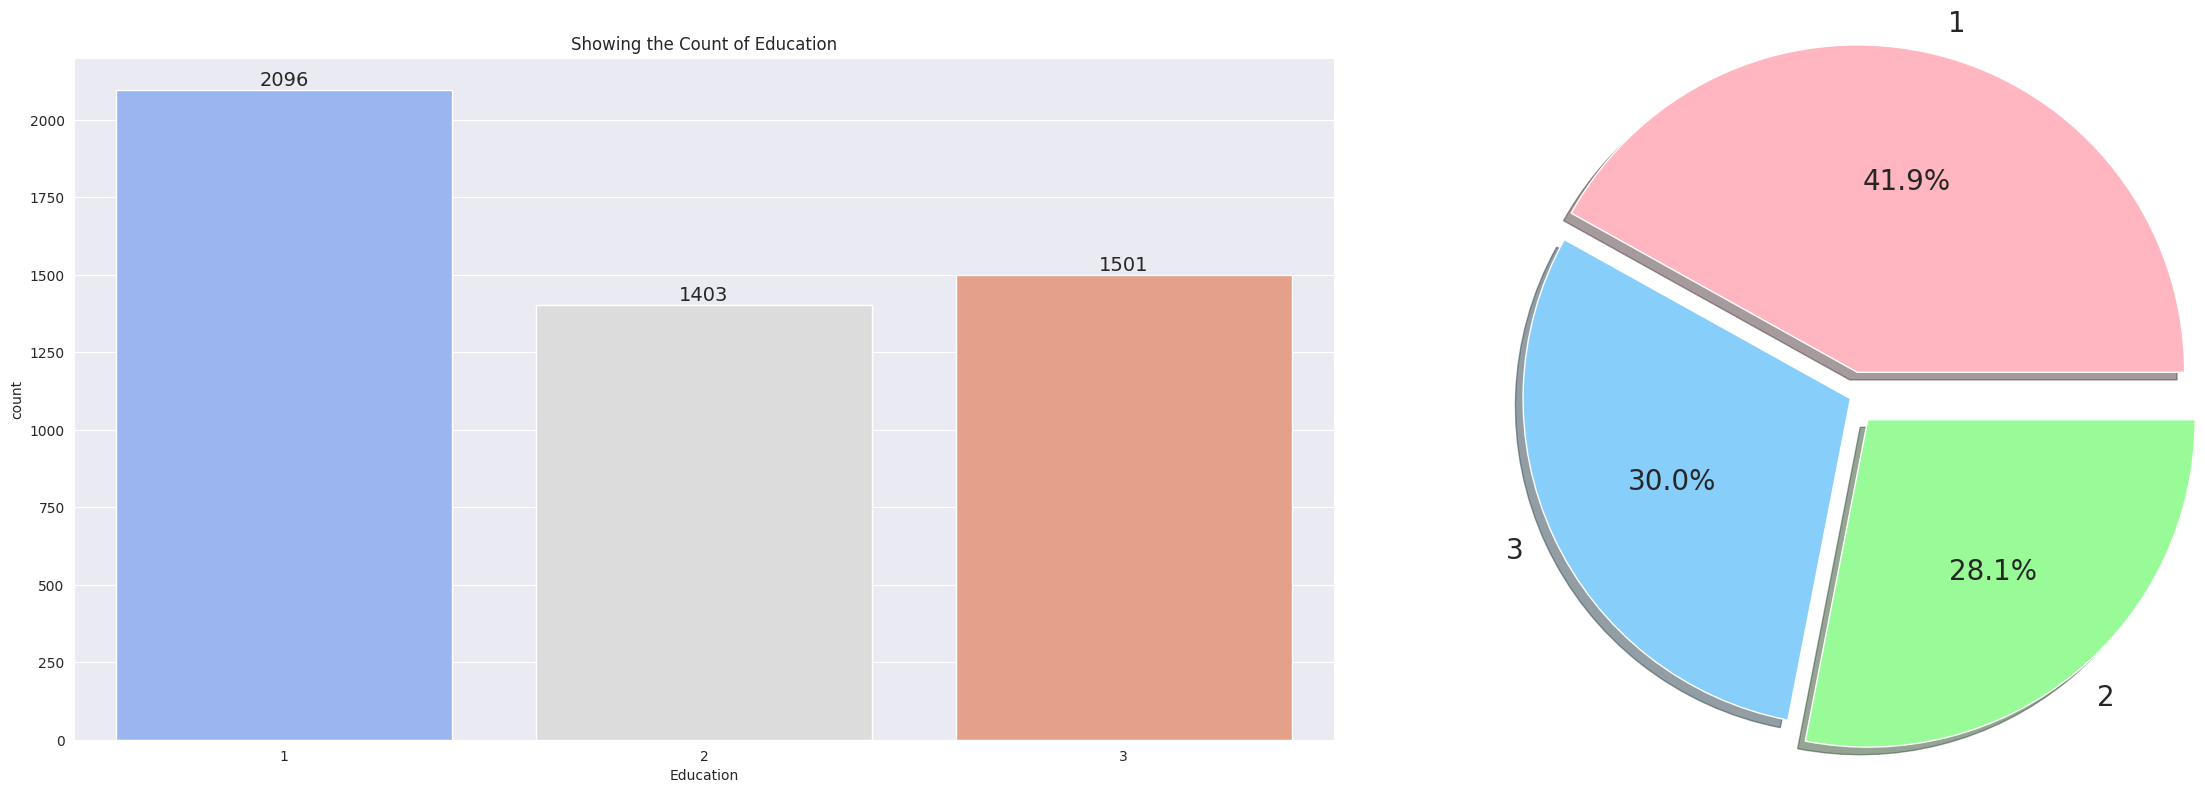

In [10]:
x = df['Education'].value_counts()
clrs = ["#FFB6C1", "#87CEFA", "#98FB98", "#FFDAB9"]  

plt.figure(figsize=(25,8))
plt.subplot(1, 2, 1)
ax = sns.countplot(data=df, x='Education', palette='coolwarm')
plt.title('Showing the Count of Education')
for bar in ax.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(), 
        int(bar.get_height()),  
        ha='center',
        va='bottom', 
        fontsize=14
    )

plt.subplot(1, 2, 2)
plt.pie(x, labels=x.index, autopct='%1.1f%%', textprops={'fontsize': 20}, colors=clrs, explode=[0.1, 0,0.1], shadow=True, radius=1.2)

plt.tight_layout()
plt.show()


The analysis shows the count of each education level along with the percentage they hold. Most people have completed Education Level 1, while the least number of people have completed Education Level 2.

/tmp/ipykernel_269252/3711271980.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Personal Loan', palette='coolwarm')


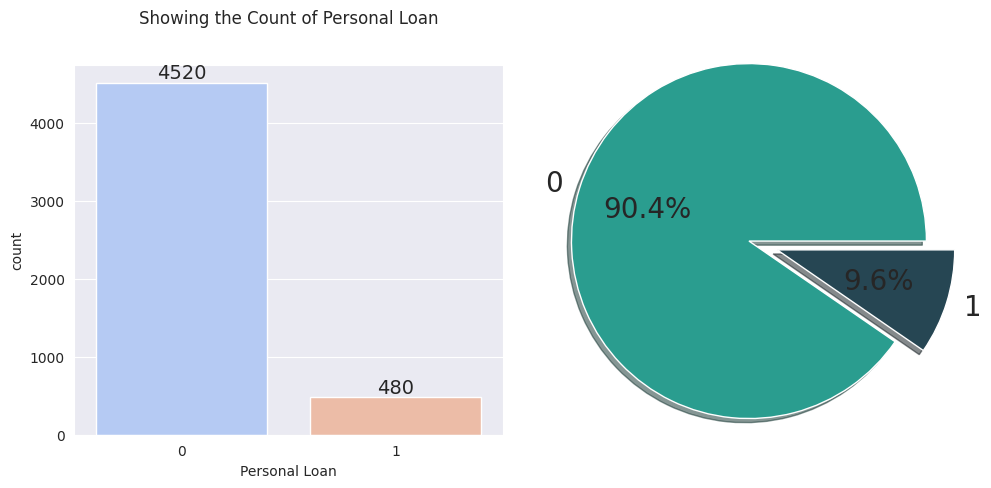

In [11]:
x = df['Personal Loan'].value_counts()
clrs = ["#2A9D8F", "#264653"]

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
ax = sns.countplot(data=df, x='Personal Loan', palette='coolwarm')
plt.title('Showing the Count of Personal Loan',y=1.09)
for bar in ax.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(), 
        int(bar.get_height()),  
        ha='center',
        va='bottom', 
        fontsize=14
    )

plt.subplot(1, 3, 2)
plt.pie(x, labels=x.index, autopct='%1.1f%%', textprops={'fontsize': 20}, colors=clrs, explode=[0.2, 0], shadow=True, radius=1.2)

plt.tight_layout()
plt.show()


The analysis reveals that most people do not receive a personal loan, with approximately 90.4% of them being ineligible. This is a significantly high percentage, indicating that personal loans are not commonly approved.

/tmp/ipykernel_269252/2819769977.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Securities Account', palette='coolwarm')


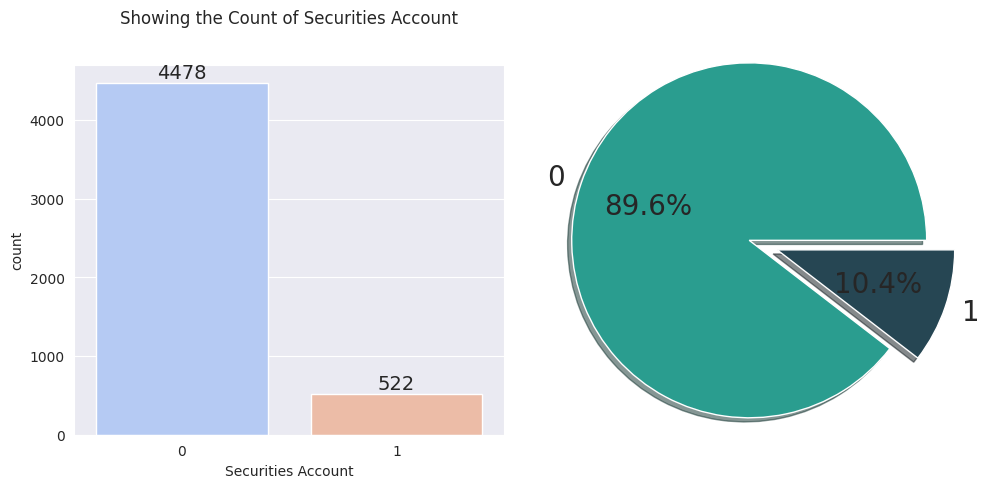

In [12]:
x = df['Securities Account'].value_counts()
clrs = ["#2A9D8F", "#264653"]

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
ax = sns.countplot(data=df, x='Securities Account', palette='coolwarm')
plt.title('Showing the Count of Securities Account',y=1.09)
for bar in ax.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(), 
        int(bar.get_height()),  
        ha='center',
        va='bottom', 
        fontsize=14
    )

plt.subplot(1, 3, 2)
plt.pie(x, labels=x.index, autopct='%1.1f%%', textprops={'fontsize': 20}, colors=clrs, explode=[0.2, 0], shadow=True, radius=1.2)

plt.tight_layout()
plt.show()


While analyzing this, I found that most people do not have a securities account.

/tmp/ipykernel_269252/4076795428.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='CD Account', palette='coolwarm')


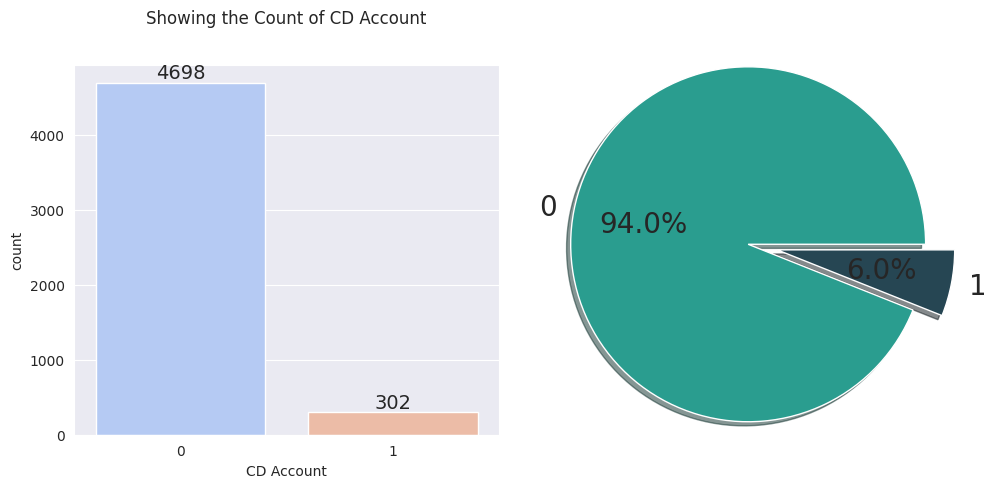

In [13]:
x = df['CD Account'].value_counts()
clrs = ["#2A9D8F", "#264653"]

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
ax = sns.countplot(data=df, x='CD Account', palette='coolwarm')
plt.title('Showing the Count of CD Account',y=1.09)
for bar in ax.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(), 
        int(bar.get_height()),  
        ha='center',
        va='bottom', 
        fontsize=14
    )

plt.subplot(1, 3, 2)
plt.pie(x, labels=x.index, autopct='%1.1f%%', textprops={'fontsize': 20}, colors=clrs, explode=[0.2, 0], shadow=True, radius=1.2)

plt.tight_layout()
plt.show()


Most of the people approx 94% do not have the deposit in the Bank

/tmp/ipykernel_269252/101223238.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Online', palette='coolwarm')


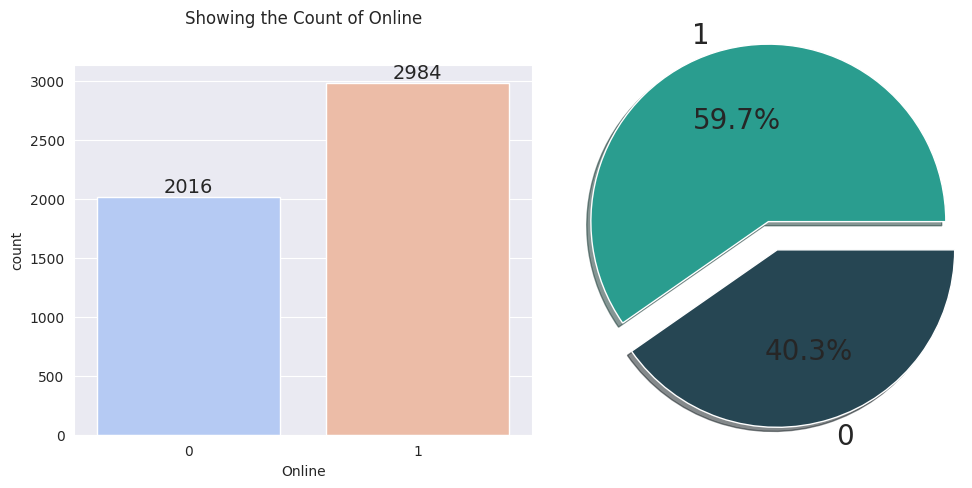

In [14]:
x = df['Online'].value_counts()
clrs = ["#2A9D8F", "#264653"]

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
ax = sns.countplot(data=df, x='Online', palette='coolwarm')
plt.title('Showing the Count of Online',y=1.09)
for bar in ax.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(), 
        int(bar.get_height()),  
        ha='center',
        va='bottom', 
        fontsize=14
    )

plt.subplot(1, 3, 2)
plt.pie(x, labels=x.index, autopct='%1.1f%%', textprops={'fontsize': 20}, colors=clrs, explode=[0.2, 0], shadow=True, radius=1.2)

plt.tight_layout()
plt.show()


Most of the people who has their account in the bank uses the Online system

/tmp/ipykernel_269252/1981929190.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='CreditCard', palette='coolwarm')


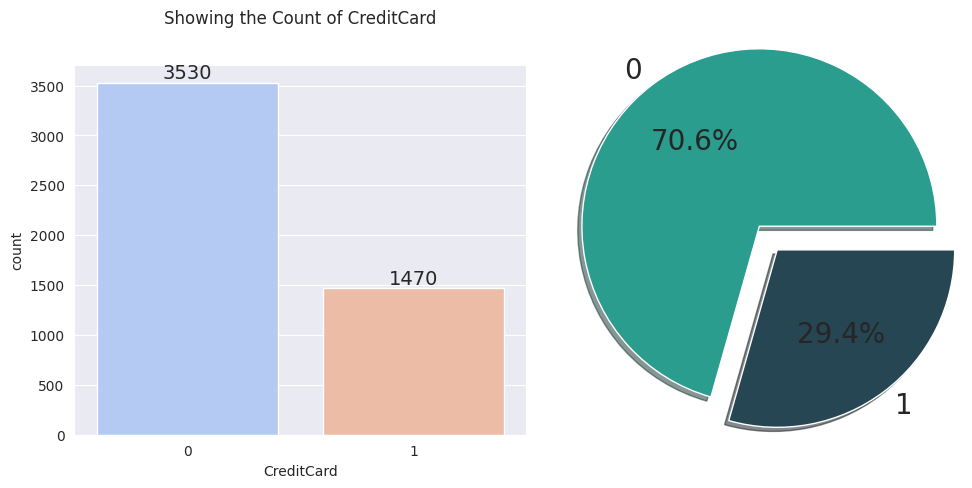

In [15]:
x = df['CreditCard'].value_counts()
clrs = ["#2A9D8F", "#264653"]

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
ax = sns.countplot(data=df, x='CreditCard', palette='coolwarm')
plt.title('Showing the Count of CreditCard',y=1.09)
for bar in ax.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(), 
        int(bar.get_height()),  
        ha='center',
        va='bottom', 
        fontsize=14
    )

plt.subplot(1, 3, 2)
plt.pie(x, labels=x.index, autopct='%1.1f%%', textprops={'fontsize': 20}, colors=clrs, explode=[0.2, 0], shadow=True, radius=1.2)

plt.tight_layout()
plt.show()


Most of the people do not have Credit Card

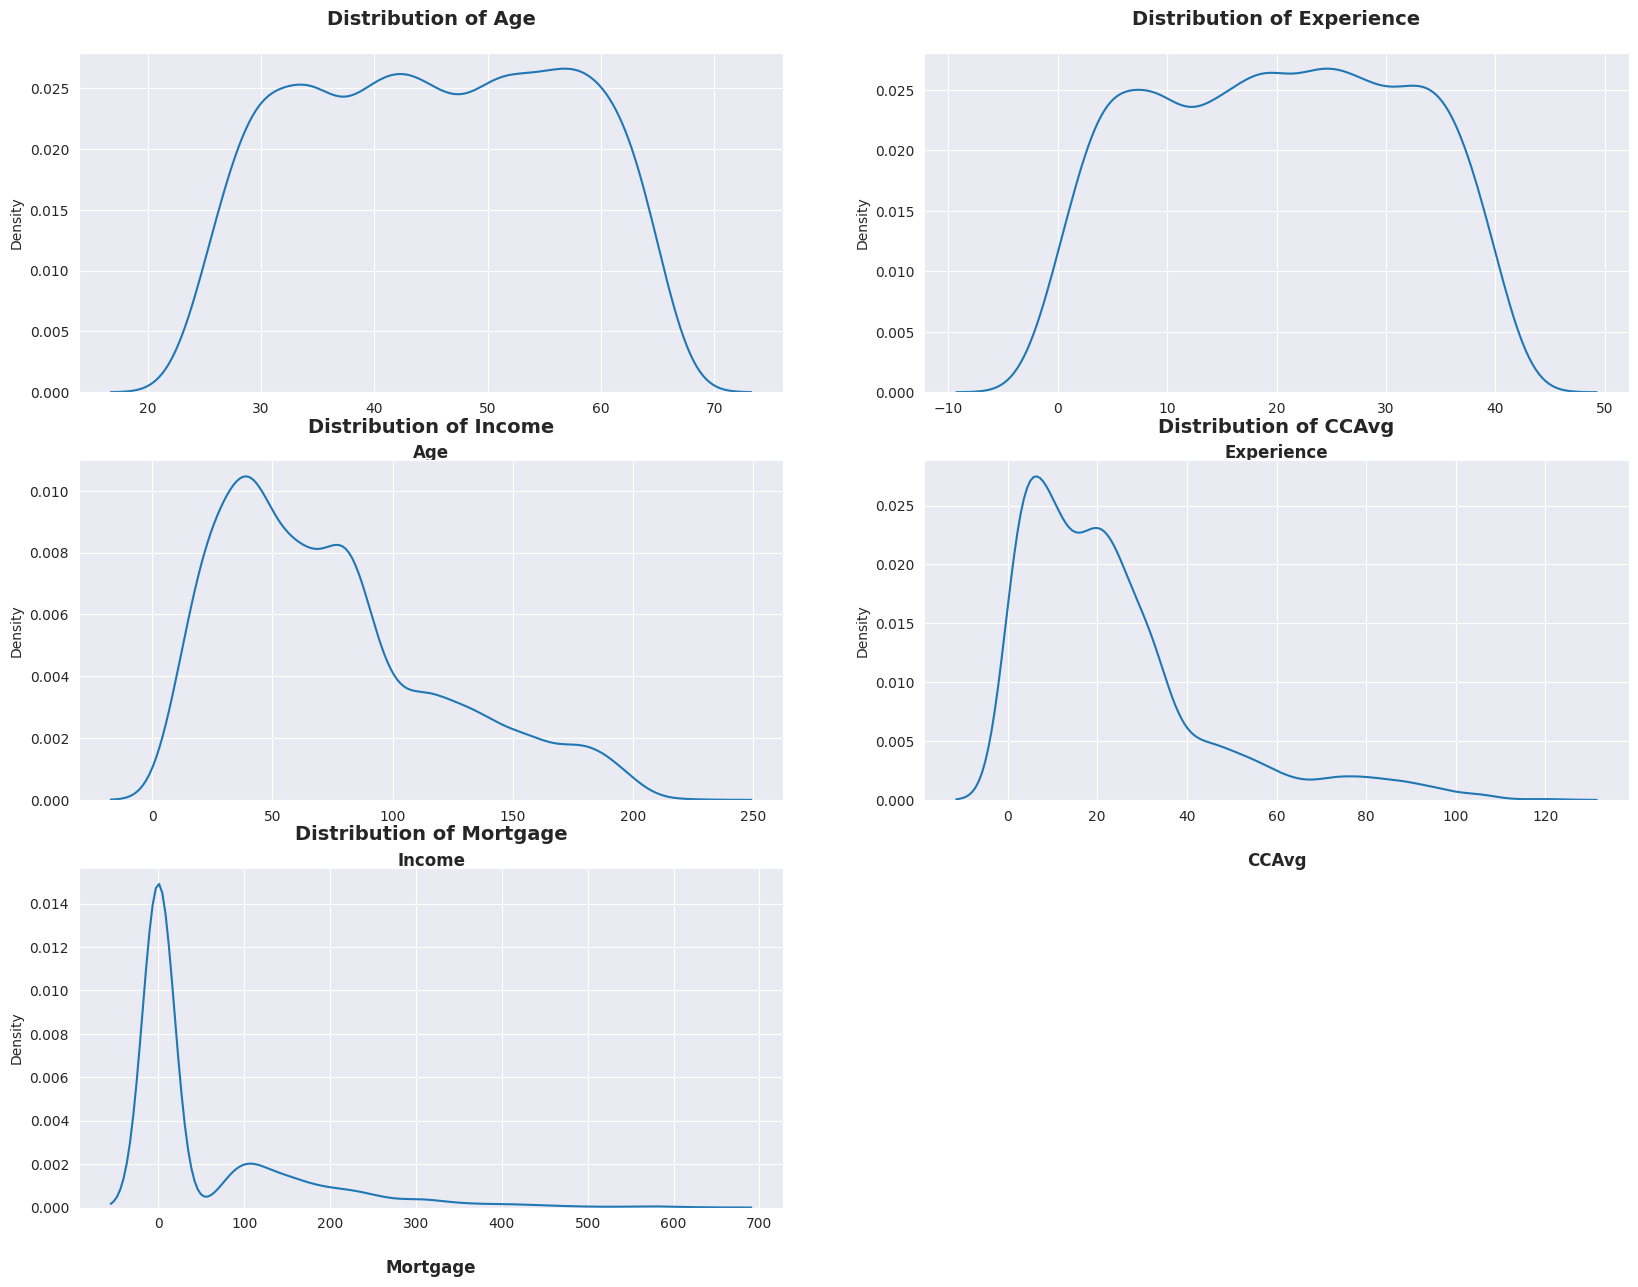

In [16]:
columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

fig, axes = plt.subplots(3,2, figsize=(20, 15))
axes = axes.flatten()
for i, cols in enumerate(columns):
    sns.kdeplot(df[cols], ax=axes[i])
    axes[i].set_title(f'Distribution of {cols}',fontsize=14, fontweight='bold', pad=20)
    axes[i].set_xlabel(cols, fontsize=12,fontweight='bold', labelpad=20)
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

    

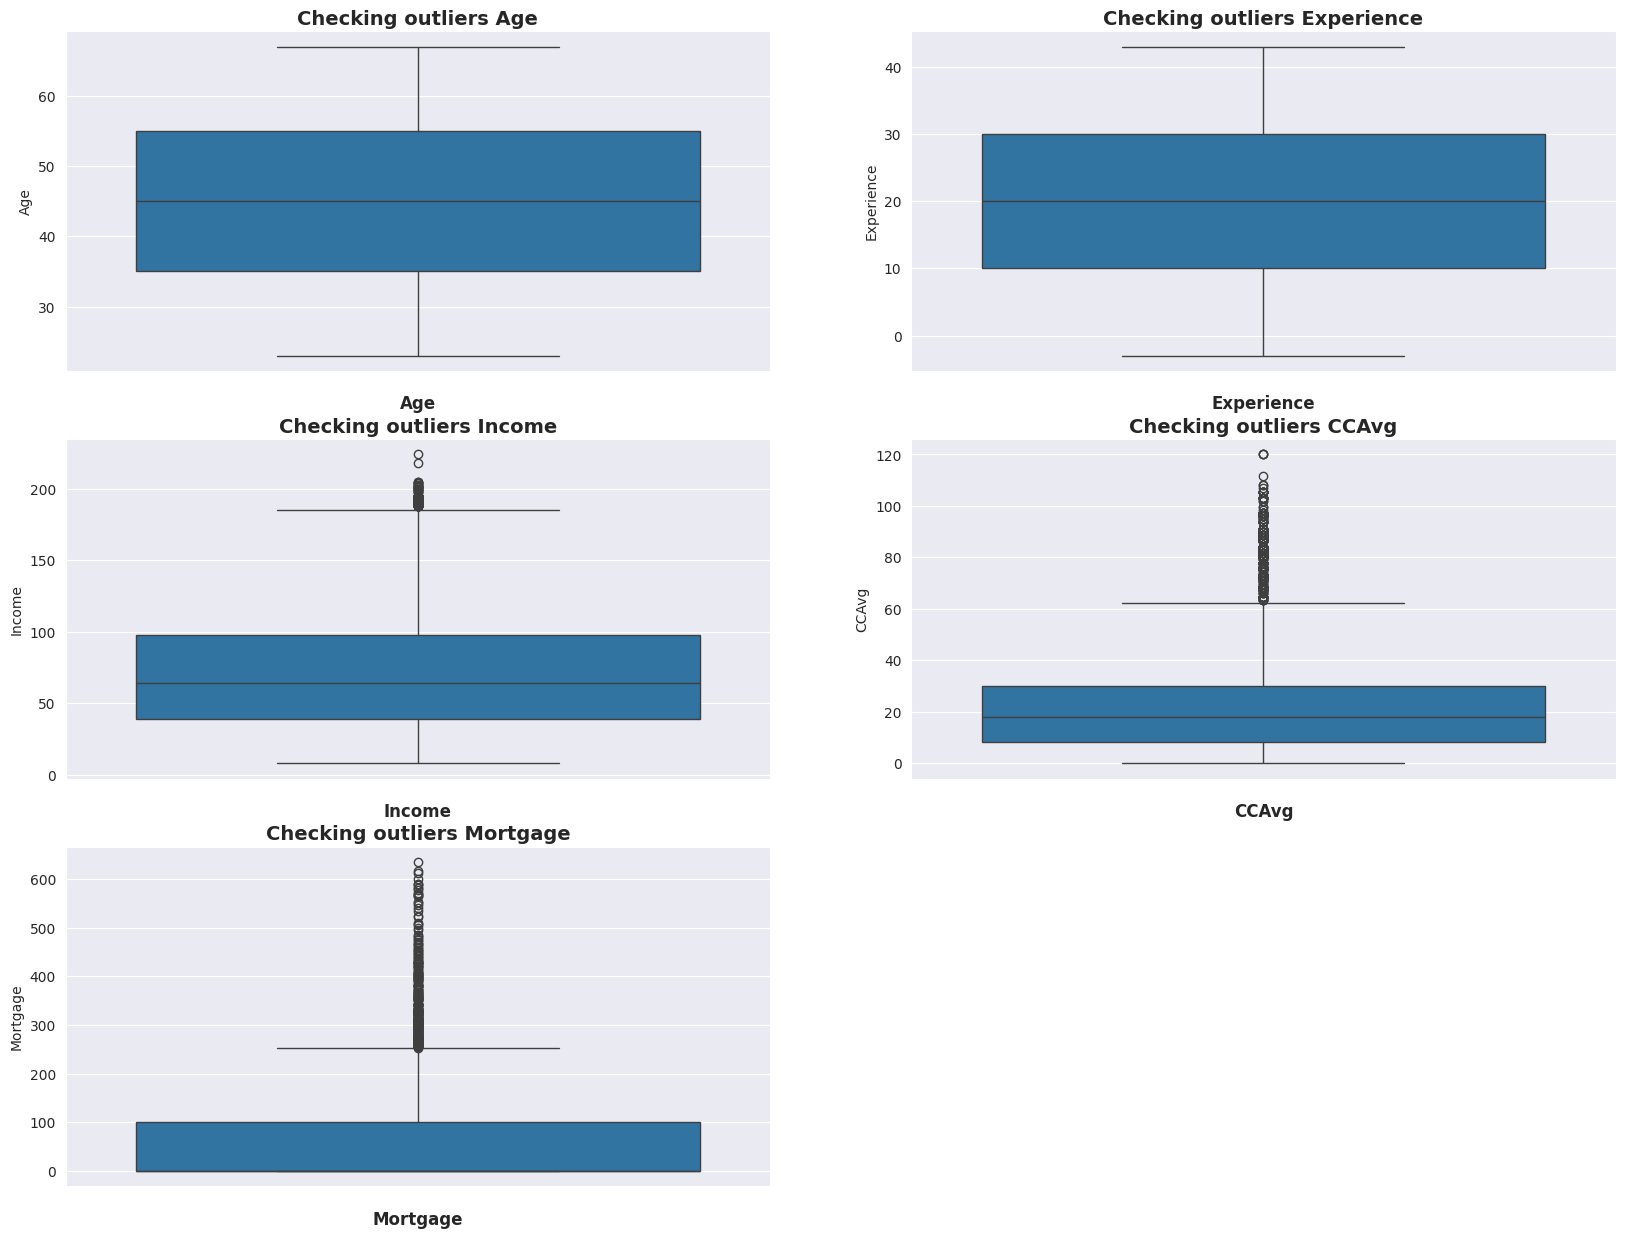

In [17]:
columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

fig, axes = plt.subplots(3,2, figsize=(20, 15))
axes = axes.flatten()
for i, cols in enumerate(columns):
    sns.boxplot(df[cols], ax=axes[i])
    axes[i].set_title(f'Checking outliers {cols}',fontsize=14, fontweight='bold', pad=5)
    axes[i].set_xlabel(cols, fontsize=12,fontweight='bold', labelpad=10)
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

    

In [18]:
def outlier_detection(data, columns):
    outlier_cnt = {}
    for i in columns:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[i] < lower_bound) | (data[i] > upper_bound)]
        outlier_cnt[i] = len(outliers)

    return outlier_cnt

In [19]:
columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
result = outlier_detection(df, columns)

for i, count in result.items():
    print(f"{i}: {count} outliers")

Age: 0 outliers
Experience: 0 outliers
Income: 96 outliers
CCAvg: 324 outliers
Mortgage: 291 outliers


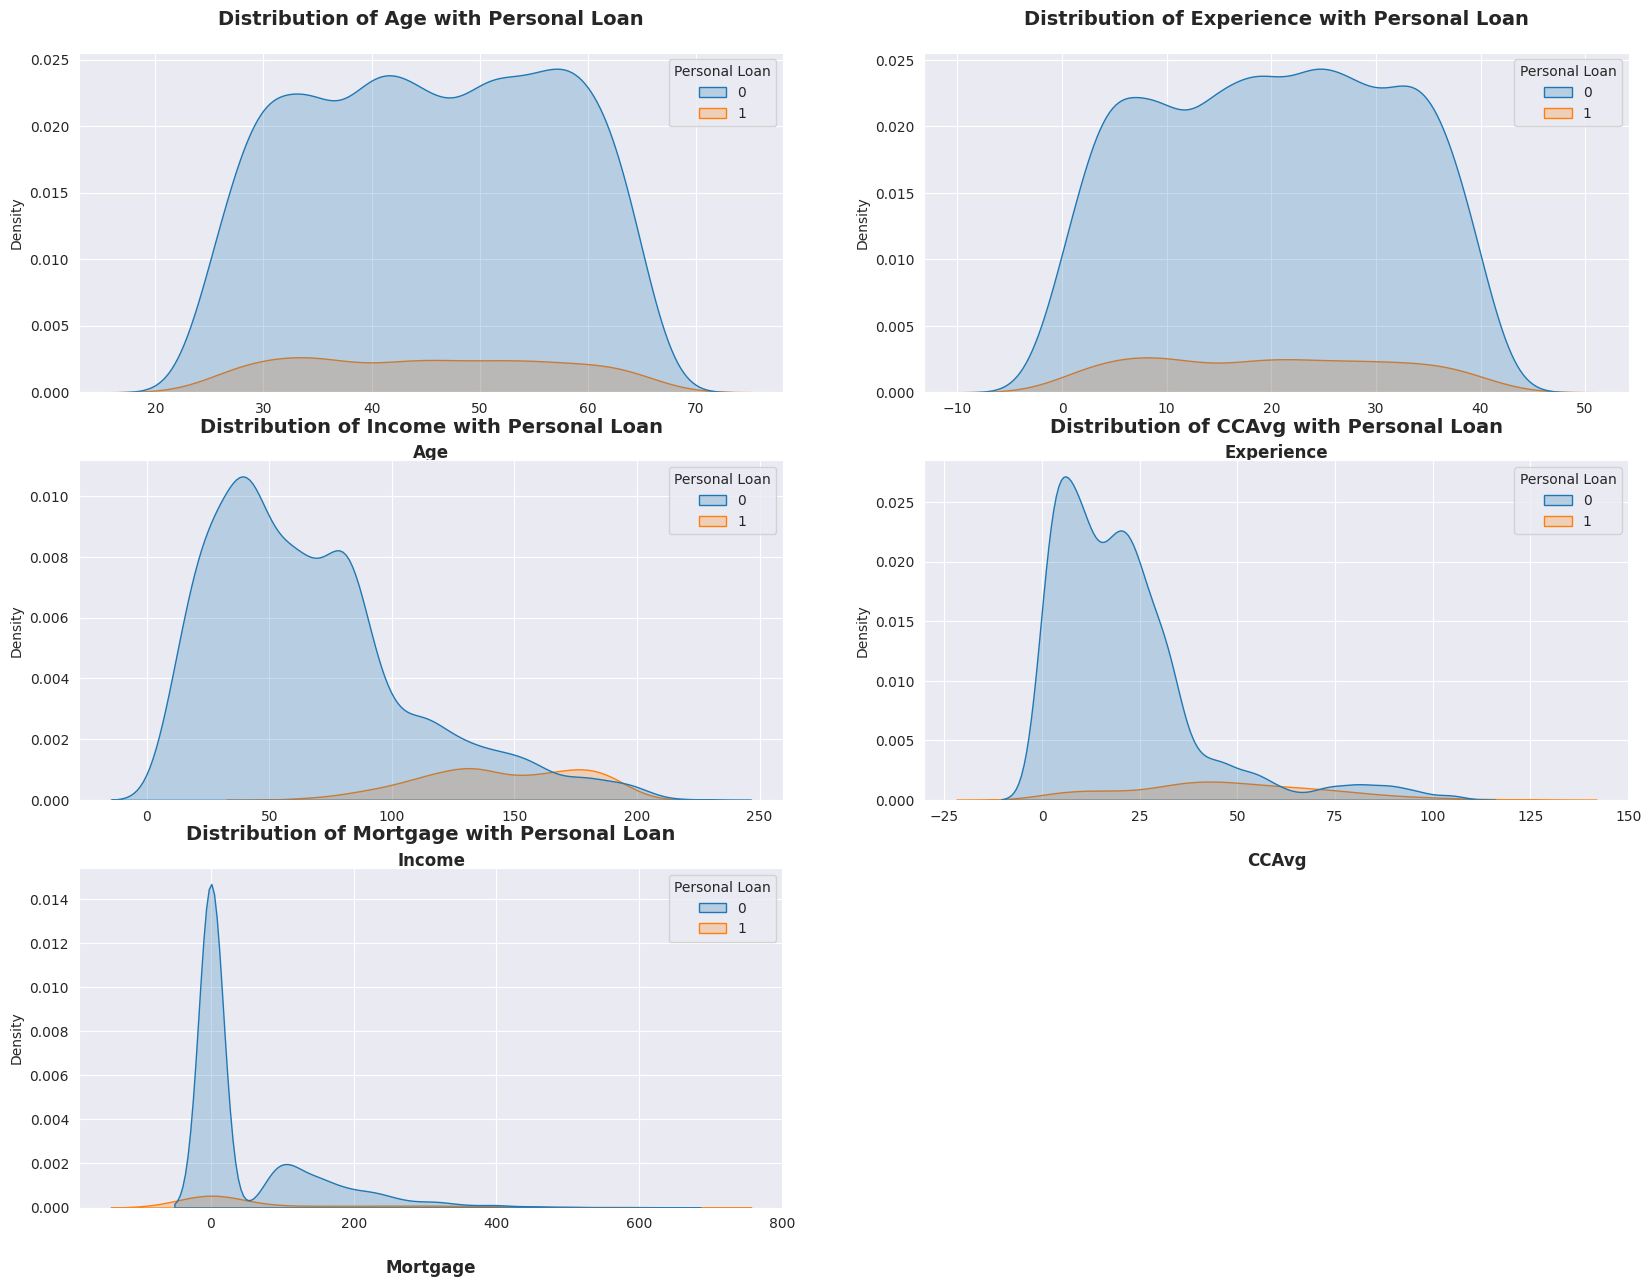

In [20]:
columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

fig, axes = plt.subplots(3,2, figsize=(20, 15))
axes = axes.flatten()
for i, cols in enumerate(columns):
    sns.kdeplot(data=df, x= cols, ax=axes[i], hue='Personal Loan',fill=True)
    axes[i].set_title(f'Distribution of {cols} with Personal Loan',fontsize=14, fontweight='bold', pad=20)
    axes[i].set_xlabel(cols, fontsize=12,fontweight='bold', labelpad=20)
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

    

In [21]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,19.2,1,0,0,1,0,0,0
1,45,19,34,3,18.0,1,0,0,1,0,0,0
2,39,15,11,1,12.0,1,0,0,0,0,0,0
3,35,9,100,1,32.4,2,0,0,0,0,0,0
4,35,8,45,4,12.0,2,0,0,0,0,0,1
